In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [3]:
XY_bal_log_Rel= np.genfromtxt('XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print(XY_bal_log_Rel [0,:])

print(XY_bal_log_Rel_data.shape)


XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0


for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0




X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1]]
Y=XY_bal_log_Rel_data[:,4]
print(X_bal_log_Rel_data.shape)
print(Y.shape)
print(10**XY_bal_log_Rel_data[:,2].min())
print(Y)

['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
(5662, 5)
(5662, 2)
(5662,)
4.056
[0. 0. 0. ... 1. 1. 1.]


IndexError: index 2 is out of bounds for axis 1 with size 2

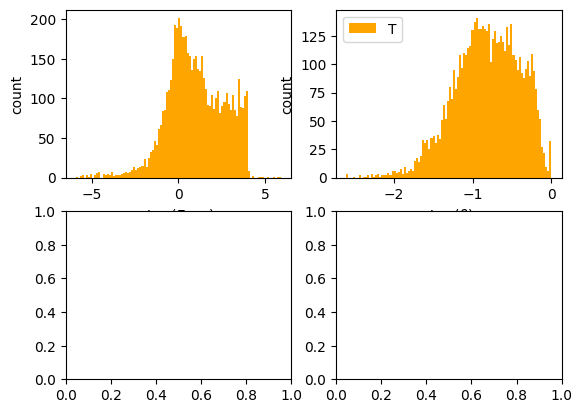

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')


ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')



fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [ ]:
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)

In [ ]:
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [ ]:
X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 2)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [ ]:
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


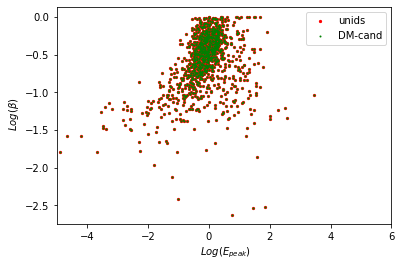

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=2
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_2F_21=open("unids_DM_std_proba_check_repeated_kfold_2F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_2F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 



rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')
    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        
           
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_2F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1]))
   

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  

    
unids_DM_std_proba_check_repeated_kfold_2F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()


print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))



rskf RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 2)
X_test_split.shape (1132, 2)


In [ ]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(10,)
OA mean 0.862768721209834 OA std 0.00841848326579048
TN mean 0.8624154779042883 TN std 0.04846378606233923
TP mean 0.863115024834695 TP std 0.04429024957731266
(1125, 2)


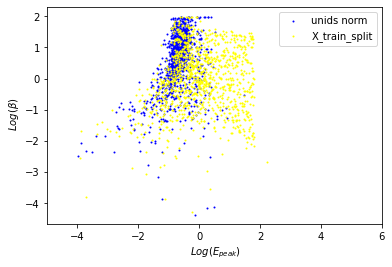

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
#plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids log',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='unids lin data',s=1)
plt.scatter(unids_std_check[:,0],unids_std_check[:,1], 
          color='blue',label='unids norm',s=1)
plt.scatter(X_test_split_std[:,0],X_test_split_std[:,1], 
          color='yellow',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

In [ ]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

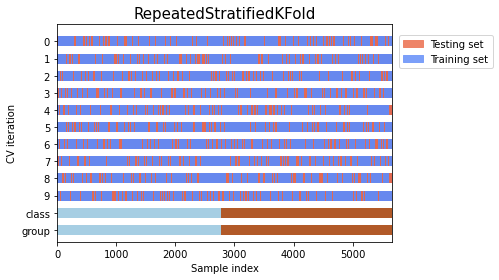

In [ ]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

In [ ]:
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


In [ ]:
unids_DM_std_proba_repeated_kfold= np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_2F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=3

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])

[0.00000000e+00 1.47044841e-13]
[1.         0.41648542]
unids_DM_std_proba_data_repeated_kfold.shape (11250, 2)
[0.00000000e+00 1.47044841e-13]
[1.         0.41648542]
[2.         0.59536826]


In [ ]:
#defining an array where each column is the probability to be DM for each unIDs in each split

#defining an array where each column is the probability to be DM for each unIDs in each split


N_unids=unids_log.shape[0]
print('N_unids',N_unids)

#N_splits=3
#N_Repeats=10

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 10
(11250, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 11)
[[0.00000000e+000 1.47044841e-013 4.16485425e-001 ... 6.25190381e-015
  4.00073957e-001 5.62239386e-004]
 [1.00000000e+000 2.09954630e-041 7.12994863e-057 ... 9.11651495e-005
  1.58085674e-052 5.09002596e-001]
 [2.00000000e+000 1.56056250e-114 1.31556997e-020 ... 9.26548906e-007
  9.33350771e-009 4.59108448e-001]
 ...
 [1.12200000e+003 3.11297893e-003 4.92745910e-001 ... 5.39099962e-001
  8.26679247e-001 4.73007492e-001]
 [1.12300000e+003 8.42992555e-002 4.60724640e-001 ... 1.73787045e-017
  2.68085057e-016 4.48458992e-001]
 [1.12400000e+003 4.95229366e-001 4.52110965e-081 ... 5.44147235e-014
  1.90690557e-049 4.79256465e-001]]


In [ ]:
unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)
p_cut=0.90
p_cut_50=0.50

unids_mean [0.2119484  0.15925779 0.26139587 ... 0.36358311 0.2631317  0.24551854] unids std [0.23523109 0.23720815 0.36230137 ... 0.33482873 0.26456216 0.25992294]
(1125,)


Text(0, 0.5, 'count')

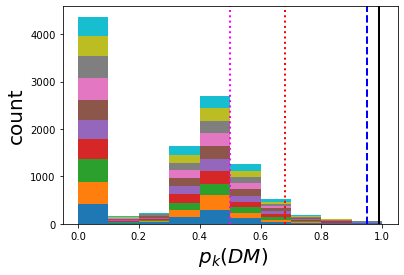

In [ ]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()
#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                             bins, histtype='barstacked', density=False)
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)

#fig.savefig("full_histo_2F.pdf", bbox_inches='tight')


In [ ]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 10)
1125
(1125, 10)
[['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']]


Text(0.31622776601683794, 1, ' $NN, 2F$')

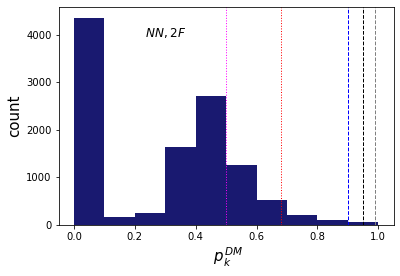

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins,histtype='barstacked', density=False, color=all_color[i,:])
#plt.scatter(bins_all[:],counts_all[:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle=':', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 2F$', y=10**(0), x=10**(-0.5), pad=-30)
#plt.yscale('log')

#fig.savefig("full_histo_2F_single_count.pdf", bbox_inches='tight')

